In [8]:
from local.lib import prepare_dataset as pre
import tensorflow as tf

In [2]:
metadata=pre.create_and_read_metadata()

In [3]:
train_sources = pre.build_sources_from_metadata(metadata)
test_sources = pre.build_sources_from_metadata(metadata, mode='test')

In [4]:
dataset = pre.make_tf_dataset(train_sources, training=False,
    batch_size=3, num_epochs=1,
    num_parallel_calls=3)
dataset = iter(dataset)


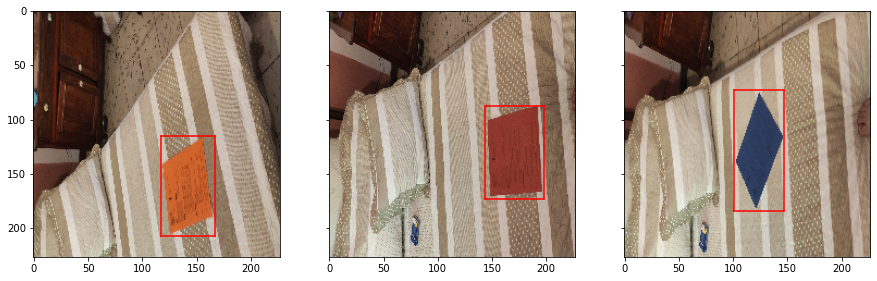

In [11]:
pre.imshow_batch_of_three(next(dataset),show_box=True)

In [14]:
#leNet

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(227,227,3)))
model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

model.add(tf.keras.layers.Dense(units=4, activation = 'sigmoid'))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(0.0001),
              metrics=[tf.keras.metrics.MeanIoU(1)])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 223, 223, 6)       456       
_________________________________________________________________
average_pooling2d_6 (Average (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 44944)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               5393400   
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [ ]:
dataset = make_dataset(train_sources, training=True,
    batch_size=4, num_epochs=1,
    num_parallel_calls=2)

testset = make_dataset(test_sources, training=True,
    batch_size=1, num_epochs=1,
    num_parallel_calls=2)

In [ ]:
#evaluate dataset with the CNN not entrened
print(model.evaluate(dataset))

In [ ]:
h=model.fit(x=dataset, epochs=10,validation_data=testset, validation_steps=1)

In [ ]:

plt.subplot(2,1,1)
plt.plot(h.history['loss'],label='train')
plt.plot(h.history['val_loss'],label='test')
plt.legend()
plt.subplot(2,1,2)
plt.plot(h.history['accuracy'],label='train')
plt.plot(h.history['val_accuracy'],label='test')
plt.legend()
